# Introduction to Machine Learning

## Definition of Machine Learning
*Field of study that gives computers the ability to learn without being explicitly programmed. Arthur Samuel (1959)*

# Machine Learning algorithms

## Supervised learning
For every given input we know how correct output should look like.
### Examples
* Given data about the size of houses on the real estate market, try to predict their price.
* Given an email content, we would like to classify it either as spam or not spam

## Unsupervised learning
For set of inputs we're trying to find the structure or relationships between different inputs.
### Example
* Take a collection of 1,000,000 different genes, and find a way to automatically group these genes into groups that are somehow similar or related by different variables, such as lifespan, location, roles, and so on.

# Supervised learning example

## House pricing prediction

In [16]:
include("helper.jl")
m = 10
X, Y = gen_samples(m)

[X Y]

10×2 Array{Float64,2}:
  50.0  172.0
  67.0  217.0
  83.0  230.0
 100.0  257.0
 117.0  256.0
 133.0  310.0
 150.0  320.0
 167.0  329.0
 183.0  387.0
 200.0  381.0

Interact.Options{:SelectionSlider,Int64}(1: "input" = 0 Int64 ,"θ0",0,"0",Interact.OptionDict(DataStructures.OrderedDict("-300"=>-300,"-290"=>-290,"-280"=>-280,"-270"=>-270,"-260"=>-260,"-250"=>-250,"-240"=>-240,"-230"=>-230,"-220"=>-220,"-210"=>-210…),Dict(-90=>"-90",210=>"210",-80=>"-80",160=>"160",170=>"170",-200=>"-200",150=>"150",300=>"300",-250=>"-250",90=>"90"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(3: "input-2" = 0.0 Float64 ,"θ1",0.0,"0.0",Interact.OptionDict(DataStructures.OrderedDict("-3.0"=>-3.0,"-2.9"=>-2.9,"-2.8"=>-2.8,"-2.7"=>-2.7,"-2.6"=>-2.6,"-2.5"=>-2.5,"-2.4"=>-2.4,"-2.3"=>-2.3,"-2.2"=>-2.2,"-2.1"=>-2.1…),Dict(1.2=>"1.2",-2.3=>"-2.3",2.0=>"2.0",1.5=>"1.5",-1.3=>"-1.3",1.4=>"1.4",-2.2=>"-2.2",-3.0=>"-3.0",0.2=>"0.2",-0.5=>"-0.5"…)),Any[],Any[],true,"horizontal")

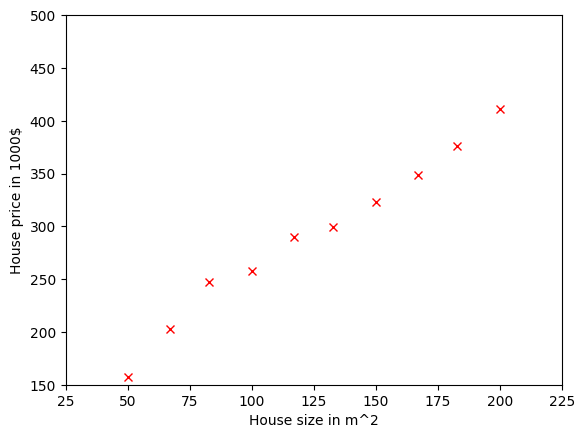

In [2]:
plot_samples(X, Y)

# Hypothesis

## Single variable
\begin{equation*}
h_{\theta}(x) = \theta_0 + \theta_1 x
\end{equation*}

## Multiple variables
\begin{equation*}
h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
\end{equation*}

## Multiple variables - vector notation
\begin{equation*}
h_{\theta}(x) = \Theta^T x
\end{equation*}

\begin{equation*}
\Theta = \begin{bmatrix}
       \theta_0 \\
       \theta_1 \\
       \theta_2 \\
       \vdots \\
       \theta_n
\end{bmatrix},
x = \begin{bmatrix}
       1 \\
       x_1 \\
       x_2 \\
       \vdots \\
       x_n
\end{bmatrix}
\end{equation*}

# Cost function

Choose $\theta_0$, $\theta_1$ so that $h_{\theta}(x)$ is close to $y$ for our training examples $(x,y)$

\begin{equation*}
J(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=1}^{m}\left(h_{\theta}(x^{(i)})-y^{(i)}\right)^2
\end{equation*}

$x^{(i)}$ and $y^{(i)}$ denotes the i-th example in training set

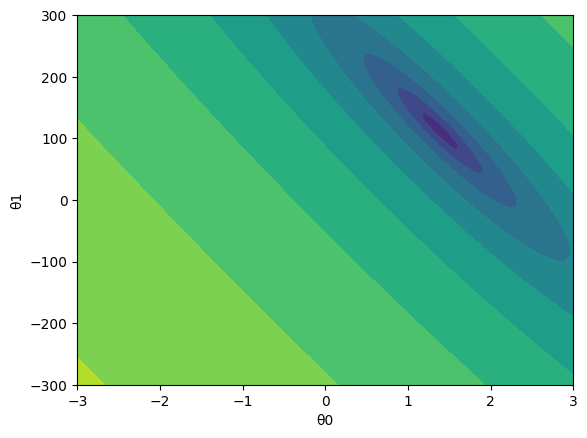

PyObject <matplotlib.text.Text object at 0x7f744fa81110>

In [18]:
X=[ones(m, 1) X]

J(Θ) = 1/2m * sum(((X * Θ) - Y).^2)

plot_cost(J)

# Cost optimization

## Gradient descent algorithm
`repeat for every` $j=0,\dots,n$

\begin{equation*}
\theta_j:=\theta_j - \alpha \frac{\partial}{\partial \theta_j}J\left(\theta_0,\dots,\theta_n\right)
\end{equation*}

`end repeat`

$\alpha$ denotes the learning rate

In [26]:
α=10.0^-4
Θ=[0.0, 0.0]

G(Θ) = 1/m * X' * (X * Θ - Y)

for i=1:10^6
    Θ = Θ - α * G(Θ)
end

Θ

2-element Array{Float64,1}:
 112.744  
   1.38525

# Improving the algorithm

In [71]:
Pkg.add("Optim")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Optim
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [28]:
using Optim

Θ=[0.0, 0.0]

G(Θ, res) = res[:] = G(Θ)

optimize(J, G, Θ, LBFGS())

Results of Optimization Algorithm
 * Algorithm: L-BFGS
 * Starting Point: [0.0,0.0]
 * Minimizer: [112.74408320223738,1.3852473343821017]
 * Minimum: 7.642798e+01
 * Iterations: 2
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: false
   * |g(x)| < 1.0e-08: true
   * f(x) > f(x'): false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 15
 * Gradient Calls: 15

# Classification problems

## Why linear regression is not suitable for classification problems?

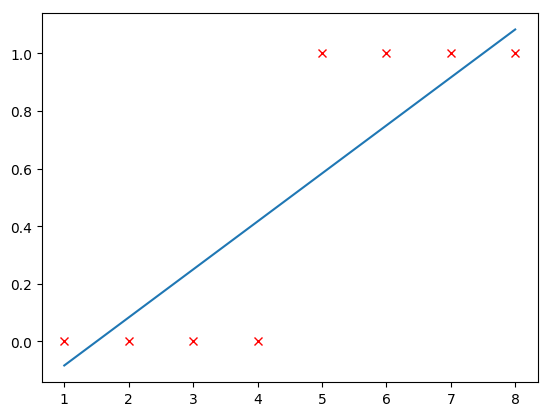

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f744e396350>

In [56]:
X = [1, 2, 3, 4, 5, 6, 7, 8]
Y = [0, 0, 0, 0, 1, 1, 1, 1]
plot(X, Y, "rx")
plot(X, 1/6 * (X - 1.5))

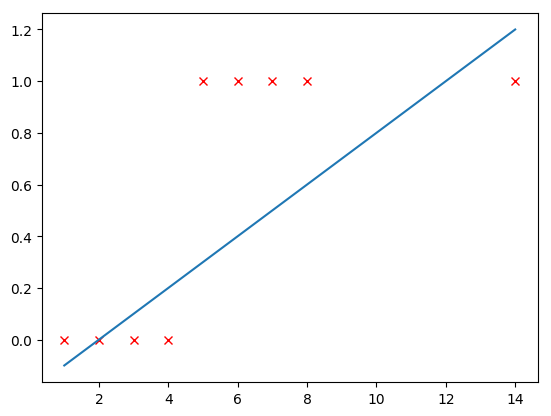

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f744e2d6c90>

In [57]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 14]
Y = [0, 0, 0, 0, 1, 1, 1, 1, 1]
plot(X, Y, "rx")
plot(X, 1/10*(X-2))

## Output of logistic regression
\begin{equation*}
h_{\theta}(x) = s(\Theta^Tx)\\
s(z)=\frac{1}{1+e^{-z}}
\end{equation*}

In [70]:
sigmoid(z) = 1.0 ./ (1.0 + exp(-z))


sigmoid([-10, -1, 0, 1, 10])

5-element Array{Float64,1}:
 4.53979e-5
 0.268941  
 0.5       
 0.731059  
 0.999955  

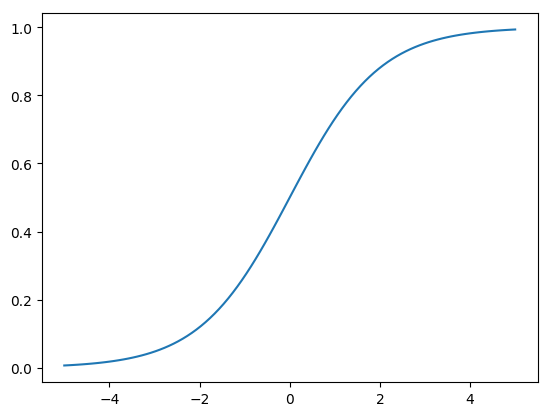

In [64]:
x = linspace(-5,5,100);
plot(x, sigmoid(x));

# Installing required dependencies

In [1]:
Pkg.add("MNIST");
Pkg.add("Images");
Pkg.add("ImageMagick");
Pkg.add("Interact");
Pkg.add("Reactive");

INFO: Installing MNIST v0.0.2


LoadError: GitError(Code:ERROR, Class:OS, Could not write to '/home/juser/.julia/v0.5/MNIST/data/train-images.idx3-ubyte': No space left on device)
 in macro expansion at ./libgit2/error.jl:99 [inlined]
 in clone(::String, ::String, ::Base.LibGit2.CloneOptions) at ./libgit2/repository.jl:191
 in #clone#112(::String, ::Bool, ::Ptr{Void}, ::Nullable{Base.LibGit2.AbstractCredentials}, ::Function, ::String, ::String) at ./libgit2/libgit2.jl:327
 in install(::String, ::String) at ./pkg/write.jl:40
 in resolve(::Dict{String,Base.Pkg.Types.VersionSet}, ::Dict{String,Dict{VersionNumber,Base.Pkg.Types.Available}}, ::Dict{String,Tuple{VersionNumber,Bool}}, ::Dict{String,Base.Pkg.Types.Fixed}, ::Dict{String,VersionNumber}, ::Set{String}) at ./pkg/entry.jl:530
 in edit(::Function, ::String, ::Base.Pkg.Types.VersionSet, ::Vararg{Base.Pkg.Types.VersionSet,N}) at ./pkg/entry.jl:30
 in (::Base.Pkg.Entry.##2#5{String,Base.Pkg.Types.VersionSet})() at ./task.jl:360

# Importing the data

In [2]:
using MNIST

features, labels = traindata()

(
[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0],

[5.0,0.0,4.0,1.0,9.0,2.0,1.0,3.0,1.0,4.0  …  9.0,2.0,9.0,5.0,1.0,8.0,3.0,5.0,6.0,8.0])

# Inspecting the data

In [3]:
size(features)

(784,60000)

In [4]:
size(labels)

(60000,)

In [5]:
features /= 255.0;

all(x -> 0.0 <= x <= 1.0, features)

true

## Displaying individual images

In [6]:
using Reactive, Interact

n, m = size(features)
sqr_n = Int64(√n)

s = slider(1:m)

Interact.Slider{Int64}(1: "input" = 30000 Int64 ,"",30000,1:60000,"horizontal",true,"d",true)

In [7]:
using Images

map(i -> colorview(Gray, reshape(features[:, i], sqr_n, sqr_n)), signal(s))

In [8]:
map(i -> labels[i], signal(s))

1.0

In [15]:
X = features[1:784, 1:1000]'
y = labels[1:1000] .== 3
θ = zeros(n, 1)
λ = 0.1


predictions = sigmoid(X * θ)
-y' * log(predictions) - (1 - y') * log(1 - predictions)
grad = 1/m * X' * (predictions - y)


784×1 Array{Float64,2}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0